<a href="https://colab.research.google.com/github/PengPengPoka/Omni-Distortion/blob/main/distortion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
for i in range(15):
  s = f"{i:02d}"
  !wget https://github.com/opencv/opencv/raw/master/samples/data/left{s}.jpg

--2023-05-29 09:33:38--  https://github.com/opencv/opencv/raw/master/samples/data/left00.jpg
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2023-05-29 09:33:38 ERROR 404: Not Found.

--2023-05-29 09:33:38--  https://github.com/opencv/opencv/raw/master/samples/data/left01.jpg
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/opencv/opencv/master/samples/data/left01.jpg [following]
--2023-05-29 09:33:38--  https://raw.githubusercontent.com/opencv/opencv/master/samples/data/left01.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connecte

In [ ]:
!pwd

/content


In [ ]:
import pandas as pd
import numpy as np
coord = pd.read_csv("coord.txt",delimiter='\t').dropna()
impoints = coord[['xim','yim']].values.astype(np.float32)
opoints = coord[['xac','yac']].values/100
n = len(impoints)
opoints = np.hstack([opoints,np.zeros((n,1))]).astype(np.float32)
# impoints = np.hstack([impoints,np.zeros((n,1))])


In [ ]:
import numpy as np
import cv2 as cv
import glob
# termination criteria
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

# sampling
# for i in range(30):
#   idx = np.random.randint(n, size=25)
#   objpoints.append(opoints[idx].astype(np.float32))
#   imgpoints.append(impoints[idx].astype(np.float32))


objpoints.append(opoints)
imgpoints.append(impoints)


In [ ]:
img = cv.imread('center.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

In [ ]:
ret, mtx, dist, rvecs, tvecs = cv.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

In [ ]:
h,  w = img.shape[:2]
newcameramtx, roi = cv.getOptimalNewCameraMatrix(mtx, dist, (w,h), 1, (w,h))
newcameramtx

array([[246.04621887,   0.        , 250.62255803],
       [  0.        , 277.72021484, 303.63912127],
       [  0.        ,   0.        ,   1.        ]])

In [ ]:
dist

array([[-7.14564675e+00,  2.99366546e+01, -5.13737773e-03,
        -2.04167589e-03, -4.45781924e+01]])

In [ ]:
cm = np.array([[480,0,320],[0,480,220],[0,0,1]])


In [ ]:
# undistort
mapx, mapy = cv.initUndistortRectifyMap(mtx, dist, None, cm, (w,h), 5)
dst = cv.remap(img, mapx, mapy, cv.INTER_LINEAR)

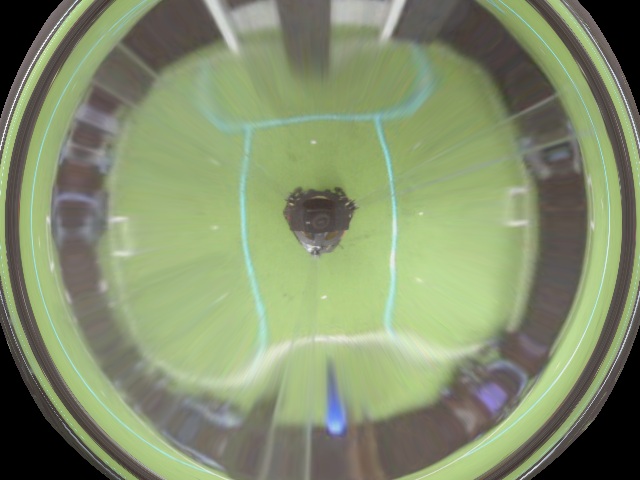

In [ ]:
from PIL import Image
Image.fromarray(dst)

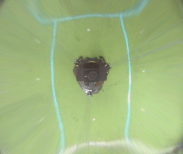

In [ ]:
# crop the image
# roinya belum benar
x, y, w, h = roi
dst = dst[y:y+h, x:x+w]
Image.fromarray(dst)

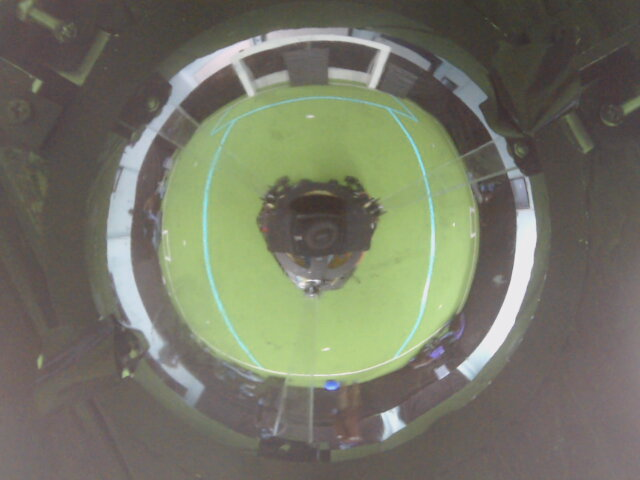

In [ ]:
Image.fromarray(img)

# OLD CODE

In [ ]:
img.shape

(480, 640, 3)

In [ ]:
import numpy as np
import cv2 as cv
import glob
# termination criteria
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*7,3), np.float32)
objp[:,:2] = np.mgrid[0:7,0:6].T.reshape(-1,2)
# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.
images = glob.glob('*.jpg')
for fname in images:
    img = cv.imread(fname)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    # Find the chess board corners
    ret, corners = cv.findChessboardCorners(gray, (7,6), None)
    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)
        corners2 = cv.cornerSubPix(gray,corners, (11,11), (-1,-1), criteria)
        imgpoints.append(corners2)
        # Draw and display the corners
        # cv.drawChessboardCorners(img, (7,6), corners2, ret)
        # cv.imshow('img', img)
        # cv.waitKey(500)
# cv.destroyAllWindows()

In [ ]:
ret, mtx, dist, rvecs, tvecs = cv.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

In [ ]:
dist

array([[-2.92971637e-01,  1.07706962e-01,  1.31038376e-03,
        -3.11018780e-05,  4.34798110e-02]])

In [ ]:
cv.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

(0.15536906910078754,
 array([[534.07088364,   0.        , 341.53407554],
        [  0.        , 534.11914595, 232.94565259],
        [  0.        ,   0.        ,   1.        ]]),
 array([[-2.92971637e-01,  1.07706962e-01,  1.31038376e-03,
         -3.11018780e-05,  4.34798110e-02]]),
 (array([[ 0.41531697],
         [ 0.65664497],
         [-1.3373494 ]]),
  array([[-0.32034625],
         [ 0.1597993 ],
         [-1.24149595]]),
  array([[-0.2645143 ],
         [-0.39360849],
         [-2.74787379]]),
  array([[-0.45883216],
         [-0.08848877],
         [-1.33510786]]),
  array([[-0.35367631],
         [-0.24363035],
         [-1.56874295]]),
  array([[-0.45993978],
         [-0.3142018 ],
         [-1.76122223]]),
  array([[-0.37843358],
         [-0.18064237],
         [-3.11615996]]),
  array([[-0.17288944],
         [-0.46764681],
         [ 1.34745198]]),
  array([[-0.29979221],
         [ 0.39216377],
         [-1.4348239 ]]),
  array([[-0.43239599],
         [ 0.25603401],


In [ ]:
img = cv.imread('left12.jpg')
h,  w = img.shape[:2]
newcameramtx, roi = cv.getOptimalNewCameraMatrix(mtx, dist, (w,h), 1, (w,h))

In [ ]:
newcameramtx, roi

(array([[457.92434692,   0.        , 342.55548195],
        [  0.        , 456.2421875 , 233.34661351],
        [  0.        ,   0.        ,   1.        ]]),
 (11, 22, 614, 437))

In [ ]:
cm = np.array([[480,0,320],[0,480,220],[0,0,1]])

In [ ]:
# undistort
mapx, mapy = cv.initUndistortRectifyMap(mtx, dist, None, cm, (w,h), 5)
dst = cv.remap(img, mapx, mapy, cv.INTER_LINEAR)
# crop the image
x, y, w, h = roi
dst = dst[y:y+h, x:x+w]

In [ ]:
%timeit dst = cv.remap(img, mapx, mapy, cv.INTER_LINEAR)
# crop the image
# x, y, w, h = roi
# dst = dst[y:y+h, x:x+w]

2.21 ms ± 261 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
mapx.shape

(480, 640)

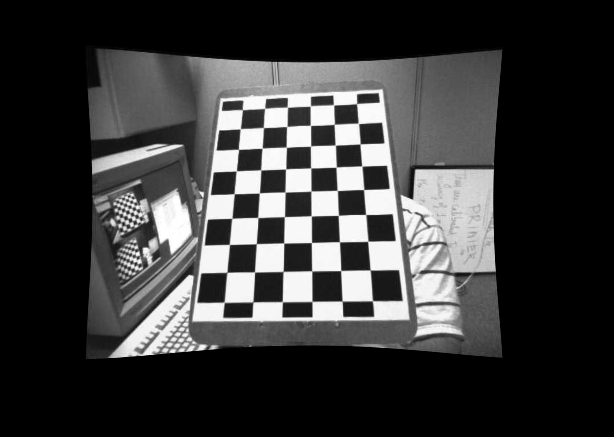

In [ ]:
from PIL import Image
Image.fromarray(dst)